In [1]:
import pandas as pd
import numpy as np
import csv
from bs4 import BeautifulSoup
import requests

In [2]:
CLIENT_ID = 'UM2MMNUUBCADECWICJK1MVSRVAABK1IK2BDUZJZDWSTCMGSG' # your Foursquare ID
CLIENT_SECRET = 'BZ1KRCKQCQCBKA2JXVTZO2M41RRDQWYC1XU2MFOH1MHS5AEF' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: UM2MMNUUBCADECWICJK1MVSRVAABK1IK2BDUZJZDWSTCMGSG
CLIENT_SECRET:BZ1KRCKQCQCBKA2JXVTZO2M41RRDQWYC1XU2MFOH1MHS5AEF


In [3]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [4]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

In [5]:
source = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_T').text

# get url

In [6]:
file = BeautifulSoup(source,'lxml')

# locate table

In [7]:
table = file.find('table')
tbody = table.find('tbody')

In [8]:
rows  = tbody.find_all('td')

# extract data from table

In [9]:
data = []

for row in rows:
    cols = []
    col1 = row.find('b')
    col1 = [col1.text.strip('<b>')]
    cols = cols + col1
    col2rows = row.find_all('a')
    
    if(len(col2rows) == 0):
        temp =['NA']
        cols = cols + temp
    else:
        for col2row in col2rows:
            temp = [col2row.get('title')]
            cols = cols + temp

    
    #cols = [ele.text.strip() for ele in cols]
    #cols = [print('hello!!!! ',ele) for ele in cols]
    #print(temp)

    
    data.append(cols) # Get rid of empty values

In [10]:
copy = data[:]

# data preprocess

In [11]:
c = 1
i = 0

while(i < len(copy)):
    if(copy[i][c] == 'NA'):
        del copy[i]
        i = i - 1
    else:
        i = i + 1

In [12]:
c = 1
i = 0

while(i < len(copy)):
    if('Calgary' not in copy[i][c]):
        del copy[i]
        i = i - 1
    else:
        i = i + 1

In [13]:
AB = pd.DataFrame(copy)

In [14]:
AB

,0,1,2,3,4,5,6,7
0,T2A,Calgary,"Penbrooke Meadows, Calgary","Marlborough, Calgary",None,None,None,None
1,T3A,Calgary,"Dalhousie, Calgary","Edgemont, Calgary","Hamptons, Calgary","Hidden Valley, Calgary",None,None
2,T2B,Calgary,"Forest Lawn, Calgary","Dover, Calgary","Erin Woods, Calgary",None,None,None
3,T3B,Calgary,"Montgomery, Calgary","Bowness, Calgary","Silver Springs, Calgary","Greenwood, Calgary",None,None
4,T2C,Calgary,"Lynnwood Ridge, Calgary","Ogden, Calgary","Foothills Industrial Park, Calgary","Great Plains, Calgary",None,None
5,T3C,Calgary,"Rosscarrock, Calgary","Westgate, Calgary","Wildwood, Calgary","Shaganappi, Calgary","Sunalta, Calgary",None
6,T2E,Calgary,"Bridgeland, Calgary","Greenview, Calgary",Calgary Zoo,Calgary International Airport,None,None
7,T3E,Calgary,"Lakeview, Calgary","Glendale, Calgary","Killarney, Calgary","Glamorgan, Calgary",None,None
8,T2G,Calgary,"Inglewood, Calgary","Burnsland, Calgary","Chinatown, Calgary","Victoria Park, Calgary",Pengrowth Saddledome,None
9,T3G,Calgary,"Hawkwood, Calgary","Arbour Lake, Calgary","Citadel, Calgary","Ranchlands, Calgary","Royal Oak, Calgary","Rocky Ridge, Calgary"


In [15]:
AB = AB.drop([3,4,5,6,7],axis = 1)

In [16]:
copy = AB.values.tolist()

In [17]:
c = 2
i = 0

while(i < len(copy)):
    if(copy[i][c] == None):
        del copy[i]
        i = i - 1
    else:
        i = i + 1

In [18]:
c = 2
i = 0

while(i < len(copy)):
    copy[i][c] = copy[i][c].replace(', Calgary','') 
    i = i+1

In [19]:
AB = pd.DataFrame(copy)

In [20]:
AB.columns=['PostCode','Borough','Neighborhood']

In [21]:
AB


,PostCode,Borough,Neighborhood
0,T2A,Calgary,Penbrooke Meadows
1,T3A,Calgary,Dalhousie
2,T2B,Calgary,Forest Lawn
3,T3B,Calgary,Montgomery
4,T2C,Calgary,Lynnwood Ridge
5,T3C,Calgary,Rosscarrock
6,T2E,Calgary,Bridgeland
7,T3E,Calgary,Lakeview
8,T2G,Calgary,Inglewood
9,T3G,Calgary,Hawkwood


# Longitude and Latitude location obtained on https://www.geonames.org/postal-codes/CA/AB/alberta.html, since there are different values for every postal code, random one will be used

## values are recorded manually

In [22]:
latitude = [51.049,51.126,51.021,51.091,50.987,51.05,51.088,50.99,51.027,51.139,50.989,51.042,50.848,51.119,51.111,51.156,51.105,51.147,51.133,50.88,51.062,51.071,51.207,51.041,51.023,51.024,50.982,50.951,50.884,51.082,50.909,50.928]

In [23]:
longitude = [-113.956,-114.142,-113.981,-114.207,-113.963,-114.139,-114.021,-114.157,-114.035,-114.201,-114.052,-114.2,-114.196,-113.947,-114.048,-114.057,-114.115,-114.313,-113.856,-113.955,-114.116,-113.693,-114.135,-114.076,-114.071,-114.1,-114.1,-114.359,-114.033,-113.958,-114.103,-113.968]

In [24]:
lat = pd.DataFrame(latitude)

In [25]:
long = pd.DataFrame(longitude)

In [26]:
AB['Latitude'] = lat

In [27]:
AB['Longitude'] = long

# Get toronto data

In [28]:
ON = pd.read_csv('ON')

In [29]:
ON = ON.drop(columns = 'Unnamed: 0')

In [30]:
ON

,Postcode,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Harbourfront,Regent Park",43.654260,-79.360636
1,M5B,Downtown Toronto,"Ryerson,Garden District",43.657162,-79.378937
2,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
3,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
4,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
5,M6G,Downtown Toronto,Christie,43.669542,-79.422564
6,M5H,Downtown Toronto,"Adelaide,King,Richmond",43.650571,-79.384568
7,M5J,Downtown Toronto,"Harbourfront East,Toronto Islands,Union Station",43.640816,-79.381752
8,M5K,Downtown Toronto,"Design Exchange,Toronto Dominion Centre",43.647177,-79.381576
9,M5L,Downtown Toronto,"Commerce Court,Victoria Hotel",43.648198,-79.379817


# Get calgary map coordinates, and generate a map

In [31]:
address = 'Calgary, AB'

geolocator = Nominatim(user_agent="AB_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Calgary are {}, {}.'.format(latitude, longitude))


The geograpical coordinate of Calgary are 51.02532675, -114.049868485806.


In [32]:
# create map of Manhattan using latitude and longitude values
map_calgary = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(AB['Latitude'], AB['Longitude'], AB['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_calgary)  
    
map_calgary

# we are primarily interested in areas near downtown, therefore, Connaught, Altadore, Elbow Park and Inglewood are chosen for comparison

In [33]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [34]:
LIMIT = 100

In [35]:
CD = AB.loc[(AB['Neighborhood'] == 'Connaught') | (AB['Neighborhood'] == 'Altadore') |(AB['Neighborhood'] == 'Elbow Park') |(AB['Neighborhood'] == 'Inglewood')]

In [36]:
CDvenues = getNearbyVenues(names = CD['Neighborhood'],latitudes = CD['Latitude'],longitudes = CD['Longitude'])

Inglewood
Connaught
Elbow Park
Altadore


In [37]:
print(CDvenues.shape)
CDvenues

(111, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Inglewood,51.027,-114.035,Crossroads Market,51.030313,-114.035053,Farmers Market
1,Inglewood,51.027,-114.035,Mug Shotz Sports Bar and Grill,51.029315,-114.030039,Sports Bar
2,Inglewood,51.027,-114.035,Naina's,51.029676,-114.030567,Café
3,Inglewood,51.027,-114.035,Loose Moose Theatre,51.030018,-114.035390,Comedy Club
4,Inglewood,51.027,-114.035,Eighty-Eight Brewing Co,51.030337,-114.032416,Brewery
5,Connaught,51.041,-114.076,Last Best Brewing And Distilling,51.042564,-114.074624,Brewery
6,Connaught,51.041,-114.076,Re:Grub,51.042700,-114.075365,Burger Joint
7,Connaught,51.041,-114.076,Yoga Passage,51.042799,-114.073123,Yoga Studio
8,Connaught,51.041,-114.076,Una Pizza + Wine,51.037922,-114.075496,Pizza Place
9,Connaught,51.041,-114.076,Singapore Sam's,51.042634,-114.073466,Chinese Restaurant


# From above data frame, we can conclude most of the venues are located in Connaught in downtown Calgary, therefore we will ignore the other neighborhoods, and we will obtain the top 20 popular venues in Connaught neighborhood

In [38]:
CD = AB.loc[(AB['Neighborhood'] == 'Connaught')]

In [39]:
CDvenues = getNearbyVenues(names = CD['Neighborhood'],latitudes = CD['Latitude'],longitudes = CD['Longitude'])

Connaught


In [40]:
CDvenues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Connaught,98,98,98,98,98,98


In [41]:
print('There are {} uniques categories.'.format(len(CDvenues['Venue Category'].unique())))

There are 61 uniques categories.


In [42]:
CDonehot = pd.get_dummies(CDvenues[['Venue Category']],prefix = '',prefix_sep = '')

In [43]:
CDonehot['Neighborhood'] = CDvenues['Neighborhood']

In [44]:
fixedcol = [CDonehot.columns[-1]] + list(CDonehot.columns[:-1])

In [45]:
CDonehot = CDonehot[fixedcol]

In [46]:
CDgrouped = CDonehot.groupby('Neighborhood').mean().reset_index()

In [47]:
CDgrouped

,Neighborhood,Bakery,Bar,Board Shop,Bookstore,Brazilian Restaurant,Brewery,Burger Joint,Café,Camera Store,Chinese Restaurant,Chocolate Shop,Cocktail Bar,Coffee Shop,Convenience Store,Cosmetics Shop,Dessert Shop,Diner,Donut Shop,Fast Food Restaurant,French Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,History Museum,Hookah Bar,Hotel,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Library,Liquor Store,Lounge,Market,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Moroccan Restaurant,Music Store,Park,Pharmacy,Pizza Place,Poutine Place,Pub,Restaurant,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Seafood Restaurant,Shop & Service,Sporting Goods Shop,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Vietnamese Restaurant,Wine Bar,Yoga Studio
0,Connaught,0.010204,0.040816,0.010204,0.020408,0.010204,0.030612,0.020408,0.030612,0.010204,0.010204,0.010204,0.010204,0.091837,0.010204,0.010204,0.010204,0.010204,0.010204,0.010204,0.020408,0.010204,0.010204,0.010204,0.010204,0.010204,0.020408,0.010204,0.010204,0.020408,0.020408,0.020408,0.010204,0.010204,0.010204,0.010204,0.010204,0.020408,0.010204,0.010204,0.020408,0.010204,0.010204,0.010204,0.010204,0.020408,0.030612,0.010204,0.061224,0.030612,0.010204,0.020408,0.010204,0.010204,0.010204,0.010204,0.010204,0.010204,0.010204,0.030612,0.010204,0.010204


In [48]:
num = 20

In [49]:
CDgrouped

,Neighborhood,Bakery,Bar,Board Shop,Bookstore,Brazilian Restaurant,Brewery,Burger Joint,Café,Camera Store,Chinese Restaurant,Chocolate Shop,Cocktail Bar,Coffee Shop,Convenience Store,Cosmetics Shop,Dessert Shop,Diner,Donut Shop,Fast Food Restaurant,French Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,History Museum,Hookah Bar,Hotel,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Library,Liquor Store,Lounge,Market,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Moroccan Restaurant,Music Store,Park,Pharmacy,Pizza Place,Poutine Place,Pub,Restaurant,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Seafood Restaurant,Shop & Service,Sporting Goods Shop,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Vietnamese Restaurant,Wine Bar,Yoga Studio
0,Connaught,0.010204,0.040816,0.010204,0.020408,0.010204,0.030612,0.020408,0.030612,0.010204,0.010204,0.010204,0.010204,0.091837,0.010204,0.010204,0.010204,0.010204,0.010204,0.010204,0.020408,0.010204,0.010204,0.010204,0.010204,0.010204,0.020408,0.010204,0.010204,0.020408,0.020408,0.020408,0.010204,0.010204,0.010204,0.010204,0.010204,0.020408,0.010204,0.010204,0.020408,0.010204,0.010204,0.010204,0.010204,0.020408,0.030612,0.010204,0.061224,0.030612,0.010204,0.020408,0.010204,0.010204,0.010204,0.010204,0.010204,0.010204,0.010204,0.030612,0.010204,0.010204


In [50]:
temp = CDgrouped[CDgrouped['Neighborhood'] == 'Connaught'].T.reset_index()

In [51]:
temp.columns = ['Venue','Frequency'] 
temp = temp.iloc[1:]

In [52]:
CA20 = temp.sort_values('Frequency',ascending = False).reset_index(drop = True).head(num)

In [53]:
CA20 = CA20.iloc[0:20]

# Top 20 most popular venues in Calgary downtown

In [54]:
CA20

,Venue,Frequency
0,Coffee Shop,0.0918367
1,Pub,0.0612245
2,Bar,0.0408163
3,Pizza Place,0.0306122
4,Vietnamese Restaurant,0.0306122
5,Brewery,0.0306122
6,Café,0.0306122
7,Restaurant,0.0306122
8,Hotel,0.0204082
9,Gym / Fitness Center,0.0204082


# Now process Toronto data using the same procedure

In [55]:
ON

,Postcode,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Harbourfront,Regent Park",43.654260,-79.360636
1,M5B,Downtown Toronto,"Ryerson,Garden District",43.657162,-79.378937
2,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
3,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
4,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
5,M6G,Downtown Toronto,Christie,43.669542,-79.422564
6,M5H,Downtown Toronto,"Adelaide,King,Richmond",43.650571,-79.384568
7,M5J,Downtown Toronto,"Harbourfront East,Toronto Islands,Union Station",43.640816,-79.381752
8,M5K,Downtown Toronto,"Design Exchange,Toronto Dominion Centre",43.647177,-79.381576
9,M5L,Downtown Toronto,"Commerce Court,Victoria Hotel",43.648198,-79.379817


In [56]:
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="ON_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))



The geograpical coordinate of Toronto are 43.653963, -79.387207.


In [184]:
# create map of Manhattan using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(ON['Latitude'], ON['Longitude'], ON['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

# We will explore downtown Toronto or Central Bay Street will  neighborhood

In [58]:
toronto = ON.loc[ON['Neighborhood'] == 'Central Bay Street']

In [59]:
toronto

,Postcode,Borough,Neighborhood,Latitude,Longitude
4,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383


In [60]:
TOvenues = getNearbyVenues(names = toronto['Neighborhood'],latitudes = toronto['Latitude'],longitudes = toronto['Longitude'])

Central Bay Street


In [61]:
TOvenues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Central Bay Street,43.657952,-79.387383,Jimmy's Coffee,43.658421,-79.385613,Coffee Shop
1,Central Bay Street,43.657952,-79.387383,Tim Hortons,43.658570,-79.385123,Coffee Shop
2,Central Bay Street,43.657952,-79.387383,Hailed Coffee,43.658833,-79.383684,Coffee Shop
3,Central Bay Street,43.657952,-79.387383,Mercatto,43.660391,-79.387664,Italian Restaurant
4,Central Bay Street,43.657952,-79.387383,The Queen and Beaver Public House,43.657472,-79.383524,Gastropub
5,Central Bay Street,43.657952,-79.387383,Panago,43.658258,-79.384313,Pizza Place
6,Central Bay Street,43.657952,-79.387383,Bubble Bath & Spa,43.659050,-79.385344,Spa
7,Central Bay Street,43.657952,-79.387383,The Elm Tree Restaurant,43.657397,-79.383761,Modern European Restaurant
8,Central Bay Street,43.657952,-79.387383,College Park Area,43.659751,-79.384911,Park
9,Central Bay Street,43.657952,-79.387383,Japango,43.655268,-79.385165,Sushi Restaurant


In [62]:
# one hot encoding
TOonehot = pd.get_dummies(TOvenues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
TOonehot['Neighborhood'] = TOvenues['Neighborhood'] 

# move neighborhood column to the first column
fixedcol = [TOonehot.columns[-1]] + list(TOonehot.columns[:-1])
TOonehot = TOonehot[fixedcol]

In [63]:
TOgrouped = TOonehot.groupby('Neighborhood').mean().reset_index()

In [64]:
TOgrouped

,Neighborhood,American Restaurant,Art Museum,Arts & Crafts Store,Bakery,Bar,Bubble Tea Shop,Burger Joint,Café,Chinese Restaurant,Clothing Store,Coffee Shop,Comic Shop,Department Store,Dessert Shop,Diner,Discount Store,Donut Shop,Falafel Restaurant,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gastropub,Gym / Fitness Center,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Korean Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Office,Park,Pizza Place,Poke Place,Portuguese Restaurant,Ramen Restaurant,Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Smoothie Shop,Spa,Steakhouse,Sushi Restaurant,Tea Room,Thai Restaurant,Vegetarian / Vegan Restaurant,Video Store,Wine Bar,Yoga Studio
0,Central Bay Street,0.011364,0.011364,0.011364,0.022727,0.022727,0.022727,0.034091,0.045455,0.022727,0.011364,0.159091,0.011364,0.011364,0.011364,0.011364,0.011364,0.011364,0.011364,0.011364,0.011364,0.011364,0.011364,0.011364,0.022727,0.022727,0.045455,0.022727,0.011364,0.011364,0.034091,0.011364,0.011364,0.011364,0.011364,0.011364,0.011364,0.011364,0.011364,0.022727,0.022727,0.034091,0.011364,0.011364,0.022727,0.011364,0.022727,0.011364,0.011364,0.011364,0.011364,0.011364,0.011364


In [65]:
temp1 = TOgrouped[TOgrouped['Neighborhood'] == 'Central Bay Street'].T.reset_index()

In [66]:
temp1.columns = ['Venue','Frequency']

In [67]:
temp1 = temp1.iloc[1:]

In [68]:
temp1['Frequency'] = temp1['Frequency'].astype(float)

In [69]:
TO20 = temp1.sort_values('Frequency',ascending = False).reset_index(drop = True).head(num)

In [70]:
TO20 = TO20.iloc[0:20]

In [71]:
TO20

,Venue,Frequency
0,Coffee Shop,0.159091
1,Italian Restaurant,0.045455
2,Café,0.045455
3,Middle Eastern Restaurant,0.034091
4,Sandwich Place,0.034091
5,Burger Joint,0.034091
6,Ice Cream Shop,0.022727
7,Spa,0.022727
8,Indian Restaurant,0.022727
9,Sushi Restaurant,0.022727


In [72]:
CA20

,Venue,Frequency
0,Coffee Shop,0.0918367
1,Pub,0.0612245
2,Bar,0.0408163
3,Pizza Place,0.0306122
4,Vietnamese Restaurant,0.0306122
5,Brewery,0.0306122
6,Café,0.0306122
7,Restaurant,0.0306122
8,Hotel,0.0204082
9,Gym / Fitness Center,0.0204082


# Now we have top 20 downtown popular venues for both Calgary, and Toronto, lets merge them

In [73]:
A = CA20[:]

In [74]:
A['freq t'] = 0

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [75]:
A = A.values.tolist()

In [76]:
B = TO20[:]

In [77]:
B = B.values.tolist()

In [78]:
B

[['Coffee Shop', 0.1590909090909091],
 ['Italian Restaurant', 0.045454545454545456],
 ['Café', 0.045454545454545456],
 ['Middle Eastern Restaurant', 0.03409090909090909],
 ['Sandwich Place', 0.03409090909090909],
 ['Burger Joint', 0.03409090909090909],
 ['Ice Cream Shop', 0.022727272727272728],
 ['Spa', 0.022727272727272728],
 ['Indian Restaurant', 0.022727272727272728],
 ['Sushi Restaurant', 0.022727272727272728],
 ['Japanese Restaurant', 0.022727272727272728],
 ['Restaurant', 0.022727272727272728],
 ['Chinese Restaurant', 0.022727272727272728],
 ['Bubble Tea Shop', 0.022727272727272728],
 ['Bar', 0.022727272727272728],
 ['Bakery', 0.022727272727272728],
 ['Salad Place', 0.022727272727272728],
 ['Poke Place', 0.011363636363636364],
 ['Portuguese Restaurant', 0.011363636363636364],
 ['Pizza Place', 0.011363636363636364]]

In [79]:
i = 0
j = 0

while(i < len(A)):
    while(j < len(B)):
        if(A[i][0] == B[j][0]):
            A[i][2] = B[j][1]
        j = j + 1
    i = i + 1
    j = 0

In [80]:
A

[['Coffee Shop', 0.09183673469387756, 0.1590909090909091],
 ['Pub', 0.061224489795918366, 0],
 ['Bar', 0.04081632653061224, 0.022727272727272728],
 ['Pizza Place', 0.030612244897959183, 0.011363636363636364],
 ['Vietnamese Restaurant', 0.030612244897959183, 0],
 ['Brewery', 0.030612244897959183, 0],
 ['Café', 0.030612244897959183, 0.045454545454545456],
 ['Restaurant', 0.030612244897959183, 0.022727272727272728],
 ['Hotel', 0.02040816326530612, 0],
 ['Gym / Fitness Center', 0.02040816326530612, 0],
 ['French Restaurant', 0.02040816326530612, 0],
 ['Lounge', 0.02040816326530612, 0],
 ['Sandwich Place', 0.02040816326530612, 0.03409090909090909],
 ['Italian Restaurant', 0.02040816326530612, 0.045454545454545456],
 ['Indian Restaurant', 0.02040816326530612, 0.022727272727272728],
 ['Middle Eastern Restaurant', 0.02040816326530612, 0.03409090909090909],
 ['Burger Joint', 0.02040816326530612, 0.03409090909090909],
 ['Bookstore', 0.02040816326530612, 0],
 ['Pharmacy', 0.02040816326530612, 0],

In [81]:
i = 0
j = 0
k = 0
ltemp = []
while(i < len(B)):
    while(j < len(A)):
        if(B[i][0] != A[j][0]):
            k = k + 1
        j = j + 1
        
    if(k == 20):
        ltemp.append(B[i])
    
    i = i + 1
    j = 0
    k = 0
        

In [82]:
D = pd.DataFrame(ltemp)

In [83]:
D

,0,1
0,Ice Cream Shop,0.022727
1,Spa,0.022727
2,Sushi Restaurant,0.022727
3,Japanese Restaurant,0.022727
4,Chinese Restaurant,0.022727
5,Bubble Tea Shop,0.022727
6,Bakery,0.022727
7,Salad Place,0.022727
8,Poke Place,0.011364
9,Portuguese Restaurant,0.011364


In [84]:
D.insert(1,'n',0)

In [85]:
D = D.values.tolist()

In [86]:
D

[['Ice Cream Shop', 0, 0.022727272727272728],
 ['Spa', 0, 0.022727272727272728],
 ['Sushi Restaurant', 0, 0.022727272727272728],
 ['Japanese Restaurant', 0, 0.022727272727272728],
 ['Chinese Restaurant', 0, 0.022727272727272728],
 ['Bubble Tea Shop', 0, 0.022727272727272728],
 ['Bakery', 0, 0.022727272727272728],
 ['Salad Place', 0, 0.022727272727272728],
 ['Poke Place', 0, 0.011363636363636364],
 ['Portuguese Restaurant', 0, 0.011363636363636364]]

In [87]:
A = A + D

In [88]:
A = pd.DataFrame(A)

In [89]:
A.fillna(0)

,0,1,2
0,Coffee Shop,0.091837,0.159091
1,Pub,0.061224,0.000000
2,Bar,0.040816,0.022727
3,Pizza Place,0.030612,0.011364
4,Vietnamese Restaurant,0.030612,0.000000
5,Brewery,0.030612,0.000000
6,Café,0.030612,0.045455
7,Restaurant,0.030612,0.022727
8,Hotel,0.020408,0.000000
9,Gym / Fitness Center,0.020408,0.000000


In [90]:
A.columns = ['Venue','Frequency Calgary','Frequency Toronto']

In [91]:
A

,Venue,Frequency Calgary,Frequency Toronto
0,Coffee Shop,0.091837,0.159091
1,Pub,0.061224,0.000000
2,Bar,0.040816,0.022727
3,Pizza Place,0.030612,0.011364
4,Vietnamese Restaurant,0.030612,0.000000
5,Brewery,0.030612,0.000000
6,Café,0.030612,0.045455
7,Restaurant,0.030612,0.022727
8,Hotel,0.020408,0.000000
9,Gym / Fitness Center,0.020408,0.000000


# Adjust the frequency of each veune as percentage of the total appearance

In [92]:
catot = A['Frequency Calgary'].sum()

In [93]:
totot = A['Frequency Toronto'].sum()

In [94]:
A['Frequency Calgary'] = A['Frequency Calgary']/catot* 100

In [95]:
A['Frequency Toronto'] = A['Frequency Toronto']/totot*100

# Modify the dataframe, and plot

In [96]:
A = A.transpose()

In [97]:
B = A[:]

In [98]:
B

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
Venue,Coffee Shop,Pub,Bar,Pizza Place,Vietnamese Restaurant,Brewery,Café,Restaurant,Hotel,Gym / Fitness Center,French Restaurant,Lounge,Sandwich Place,Italian Restaurant,Indian Restaurant,Middle Eastern Restaurant,Burger Joint,Bookstore,Pharmacy,Moroccan Restaurant,Ice Cream Shop,Spa,Sushi Restaurant,Japanese Restaurant,Chinese Restaurant,Bubble Tea Shop,Bakery,Salad Place,Poke Place,Portuguese Restaurant
Frequency Calgary,15.7895,10.5263,7.01754,5.26316,5.26316,5.26316,5.26316,5.26316,3.50877,3.50877,3.50877,3.50877,3.50877,3.50877,3.50877,3.50877,3.50877,3.50877,3.50877,1.75439,0,0,0,0,0,0,0,0,0,0
Frequency Toronto,25,0,3.57143,1.78571,0,0,7.14286,3.57143,0,0,0,0,5.35714,7.14286,3.57143,5.35714,5.35714,0,0,0,3.57143,3.57143,3.57143,3.57143,3.57143,3.57143,3.57143,3.57143,1.78571,1.78571


In [99]:
B.columns = B.loc['Venue']

In [100]:
B = B.drop(['Venue'],axis = 0)

In [101]:
A = B

In [102]:
T = A.loc['Frequency Toronto']

In [103]:
C = A.loc['Frequency Calgary']

In [104]:
C

Venue
Coffee Shop                  15.7895
Pub                          10.5263
Bar                          7.01754
Pizza Place                  5.26316
Vietnamese Restaurant        5.26316
Brewery                      5.26316
Café                         5.26316
Restaurant                   5.26316
Hotel                        3.50877
Gym / Fitness Center         3.50877
French Restaurant            3.50877
Lounge                       3.50877
Sandwich Place               3.50877
Italian Restaurant           3.50877
Indian Restaurant            3.50877
Middle Eastern Restaurant    3.50877
Burger Joint                 3.50877
Bookstore                    3.50877
Pharmacy                     3.50877
Moroccan Restaurant          1.75439
Ice Cream Shop                     0
Spa                                0
Sushi Restaurant                   0
Japanese Restaurant                0
Chinese Restaurant                 0
Bubble Tea Shop                    0
Bakery                          

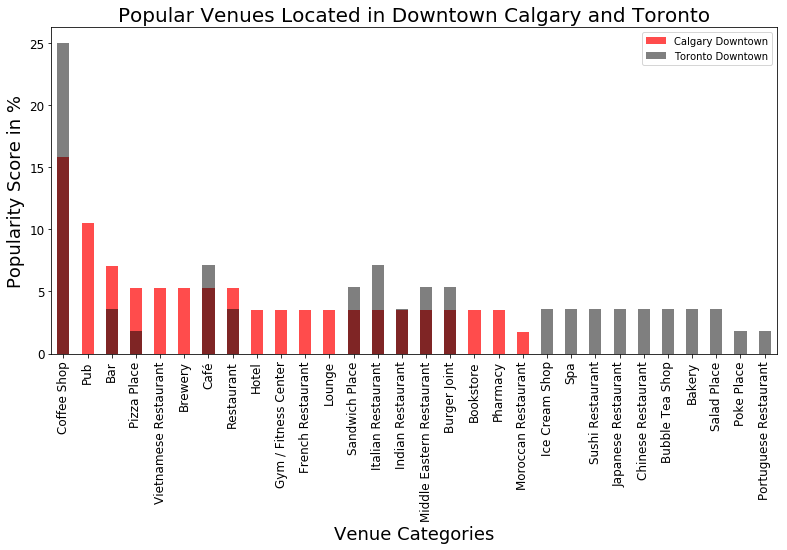

In [119]:
p1 = C.plot(kind = 'bar',figsize = (13,6),alpha = 0.7,color = 'red',fontsize = 12)
T.plot(kind = 'bar', ax = p1,alpha = 0.5,color = 'black')
p1.set_title('Popular Venues Located in Downtown Calgary and Toronto',fontsize = 20)
p1.set_xlabel('Venue Categories',fontsize = 18)
p1.set_ylabel('Popularity Score in %',fontsize = 18)
p1.legend(['Calgary Downtown','Toronto Downtown'])